# Online Payments Fraud Detection


### In this lesson, we will train a Classification Model to detect whether there are fraudsters online, by credit card or in person at the bank.

<a href='https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/data' target=_blank>You can find the data file here</a>

<img src=https://www.outseer.com/wp-content/uploads/Payment-Fraud-Detection_Overgraph.jpg width='400'>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
abs(df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest    0.005885
newbalanceOrig    0.008148
Name: isFraud, dtype: float64

In [8]:
x=df.drop(['isFraud','nameOrig','nameDest','isFlaggedFraud'],axis=1)
y=df[['isFraud']]

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 339.8+ MB


In [10]:
x=pd.get_dummies(x,drop_first=True)

In [11]:
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,False,False,False,True


In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [15]:
model=Sequential()
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=5,verbose=1)

Epoch 1/5
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 93s 578us/step - accuracy: 0.9981 - loss: 69.4441 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 2/5
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 95s 595us/step - accuracy: 0.9987 - loss: 0.0099 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 3/5
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 93s 585us/step - accuracy: 0.9987 - loss: 0.0098 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 4/5
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 92s 580us/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 5/5
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 91s 572us/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0098


In [17]:
loss,accuracy=model.evaluate(x_test,y_test)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 10s 256us/step - accuracy: 0.9987 - loss: 0.0100


In [18]:
accuracy

0.9987269639968872

In [19]:
tahmin=model.predict(x_test)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 10s 245us/step


In [20]:
model.save('Fraud.keras')

In [21]:
print(y_test)

         isFraud
3737323        0
264914         0
85647          0
5899326        0
2544263        0
...          ...
2210524        0
956542         0
5474798        0
878120         0
1592828        0

[1272524 rows x 1 columns]


In [22]:
import matplotlib.pyplot as plt

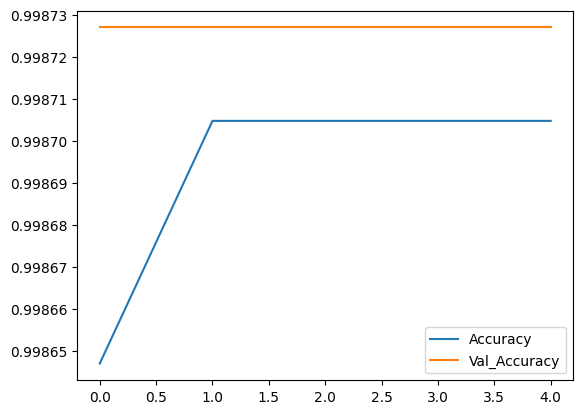

In [23]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [24]:
loss_f=pd.DataFrame(history.history)

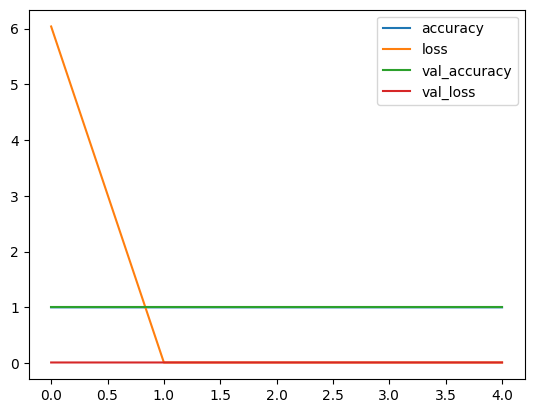

In [25]:
loss_f.plot();

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [27]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[1270904,       0],
       [   1620,       0]])

In [28]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

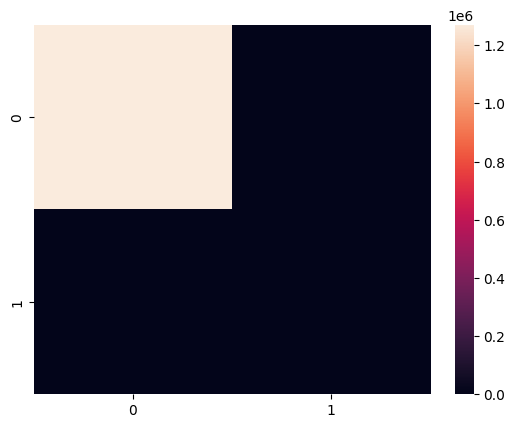

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [31]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.00      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



## In this project, accuracy: 0.9987 - loss: 0.0100 appeared. With this model, banks will have an easier time detecting fraudsters